In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Newton's Method

The Newton's method makes use of calculus. It assumes that $f$ is continuous. We take the Taylor expansion of $f(x)$ around $x^{k-1}$.
\
\
\begin{align}
    f(x) = f(x^{(k-1)}) + (x - x^{(k-1)}) f'(x^{(k-1)}) + \ldots
\end{align}
\
\
We assume that $f(x)$ is linear (no second- and higher-order derivative terms). Let $x = x^*$
\
\
\begin{align}
    f(x^*) = 0 = f(x^{(k-1)}) + (x^* - x^{(k-1)}) f'(x^{(k-1)})
\end{align}
\
\
We can rearrange this as 
\
\
\begin{align}
    x^* = x^{(k-1)} - \frac{f(x^{(k-1)})}{f'(x^{(k-1)})}
\end{align}
\
\
We iterate the equation above until we are close enough to the root.
\
\
\begin{align}
    x^{(k)} = x^{(k-1)} - \frac{f(x^{(k-1)})}{f'(x^{(k-1)})},\qquad k=1,2,\ldots
\end{align}

In [2]:
def newtons_method(f, df, x0, kmax=int(1e6), tol=1.e-12):
    '''
    Provides the approximate root using Newton's method.
    
    Parameters
    -----------
        f: function
                Function that we want to find the root.
                
        df: function
                Derivative of f(x).
                
        x0: number
                Initial guess.
                
        kmax: integer
                Maximum iterations.
        
        tol: integer
                stopping criteria
        
        
    Returns
    --------
        x: number
            root
    
    '''
    
    x = x0
    for k in range(0, kmax):
        # Newton's method
        x_new = x - (f(x) / df(x))
        
        # Stopping criteria
        if np.abs((x_new - x) / x_new) < tol:
            break
            
        else:
            x = x_new
    print("Solution found after", k, "iterations.")
    return x

### Example 1

In [6]:
f = lambda x: x**3 - x**2 - 1
df = lambda x: 3*x**2 - 2*x

root = newtons_method(f,df,-3)
print(root)

Solution found after 36 iterations.
1.4655712318767702


<IPython.core.display.Javascript object>


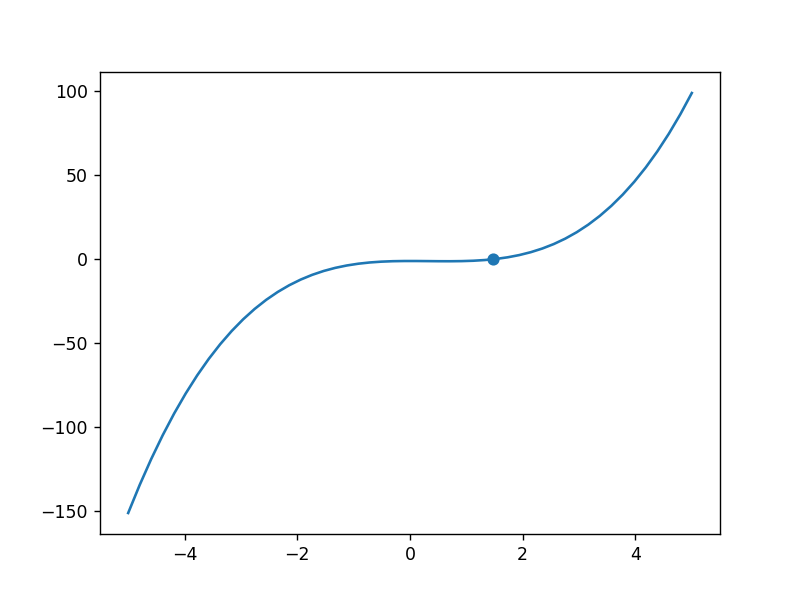

In [7]:
x = np.linspace(-5,5)

plt.figure()
plt.plot(x, f(x))
plt.scatter(root, f(root))

### Example 2

Solution found after 7 iterations.


<IPython.core.display.Javascript object>


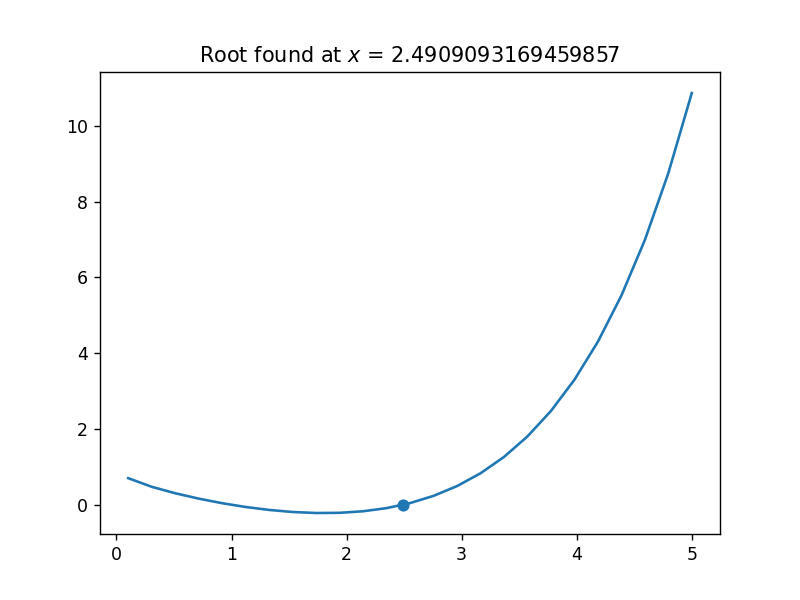

<ipython-input-12-2f1e3ce97ce1>:1: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: np.exp(x - np.sqrt(x)) - x


Text(0.5, 1.0, 'Root found at $x$ = 2.4909093169459857')

In [12]:
f = lambda x: np.exp(x - np.sqrt(x)) - x
df = lambda x: np.exp(x - np.sqrt(x))*(1 - (1/(2 * np.sqrt(x)))) - 1

root = newtons_method(f,df,2)

# Plot
x = np.linspace(-5,5)

plt.figure()
plt.plot(x, f(x))
plt.scatter(root, f(root))
plt.title(r'Root found at $x$ = {}'.format(root))

# SciPy implementation

In [1]:
from scipy import optimize as opt

# Example 1

In [2]:
f = lambda x: x**3 - x**2 - 1
df = lambda x: 3*x**2 - 2*x

opt.newton(df, x0=-3, tol=1e-10, maxiter=500)

-3.3069962075113872e-21